In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df.shape

(891, 12)

In [8]:
df.sample(n=150)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S


# EDA

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
percent_missing = df.isnull().sum()*100/len(df)

In [11]:
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

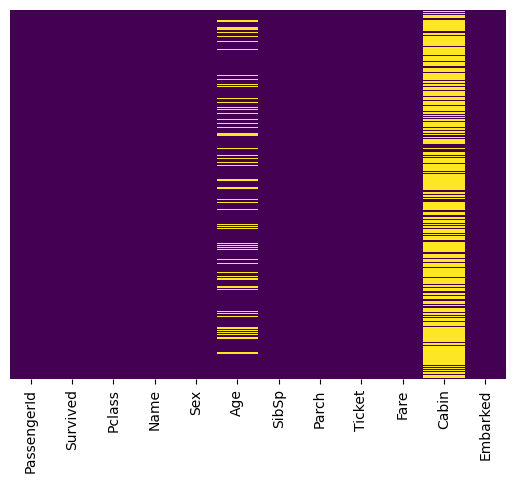

In [12]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

# Univariate analysis


<Axes: xlabel='Survived', ylabel='count'>

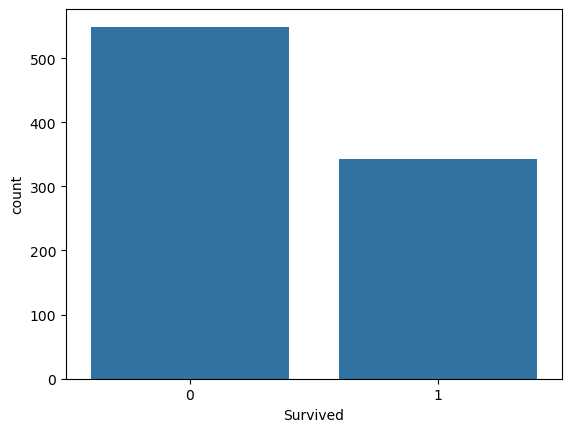

In [13]:
sns.countplot(x='Survived',data=df)

- Count of deseased people are more.

# Bivariate analysis

<Axes: xlabel='Survived', ylabel='count'>

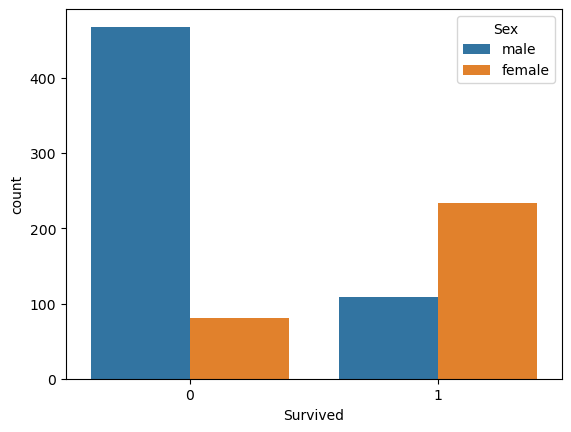

In [14]:
sns.countplot(x='Survived',hue='Sex',data=df)

- Count of male are more than female as not survived

<Axes: xlabel='Survived', ylabel='count'>

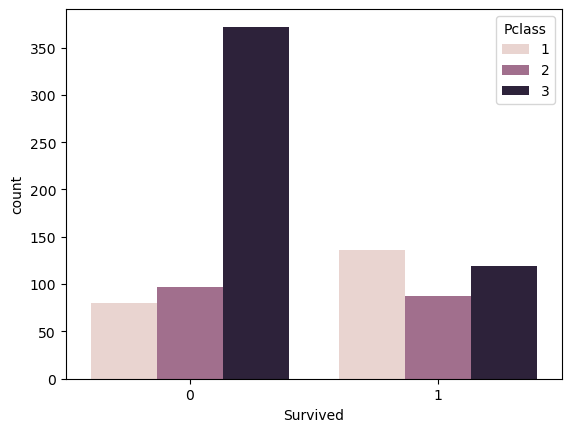

In [15]:
sns.countplot(x='Survived',hue='Pclass',data=df)

- People who bought cheap class tickets have high deseased rate

# Multivariate analysis

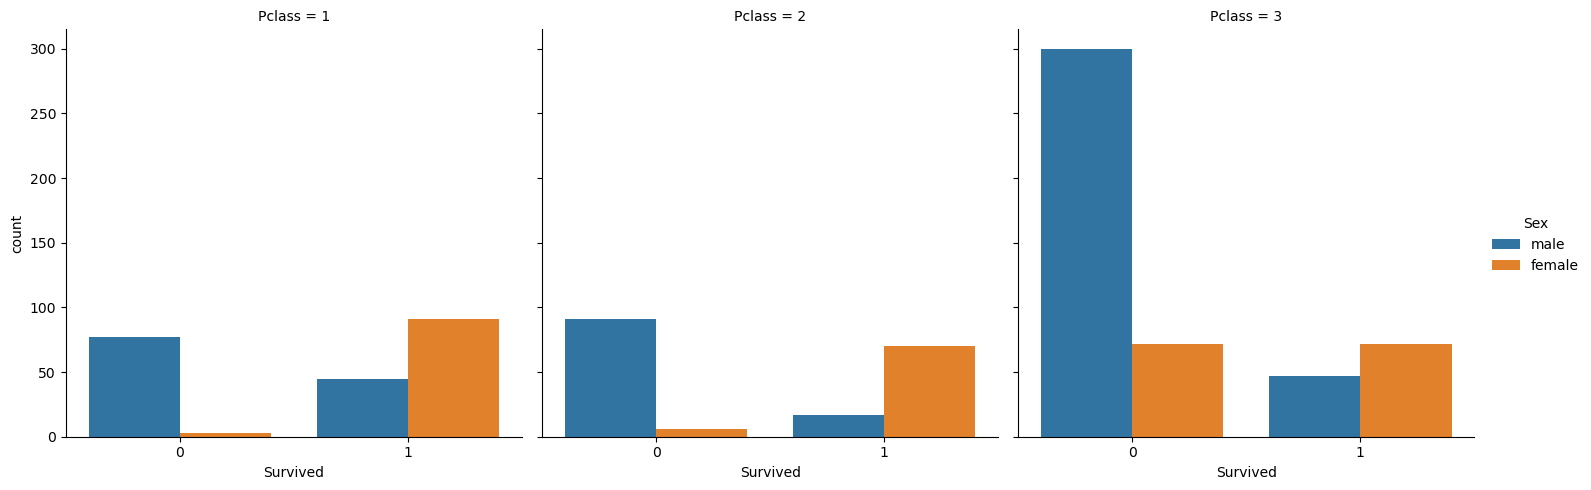

In [16]:
sns.catplot(x='Survived', hue='Sex', col='Pclass', kind='count', data=df)

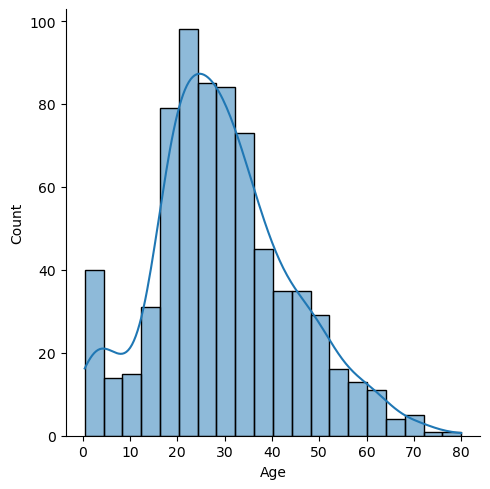

In [17]:
sns.displot(x='Age',data=df,kde=True)

<Axes: xlabel='Age', ylabel='Count'>

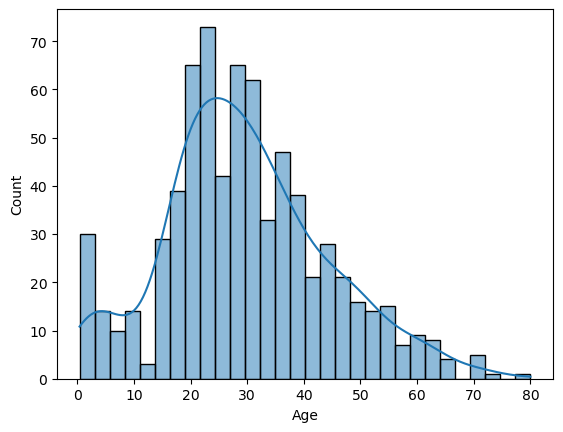

In [18]:
sns.histplot(df['Age'].dropna(),kde=True,bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

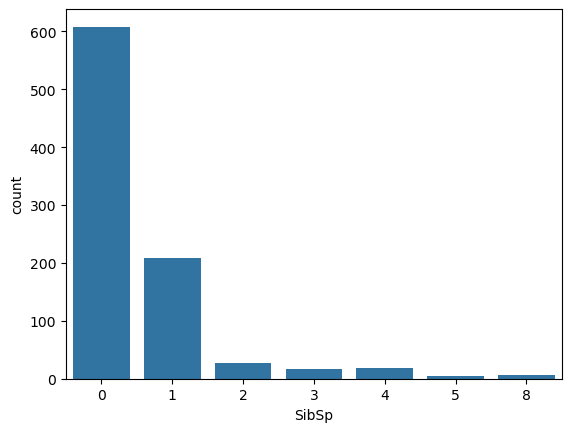

In [19]:
sns.countplot(x='SibSp',data=df)

- most number of passengers did not had anyone with them

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Fare', ylabel='Count'>

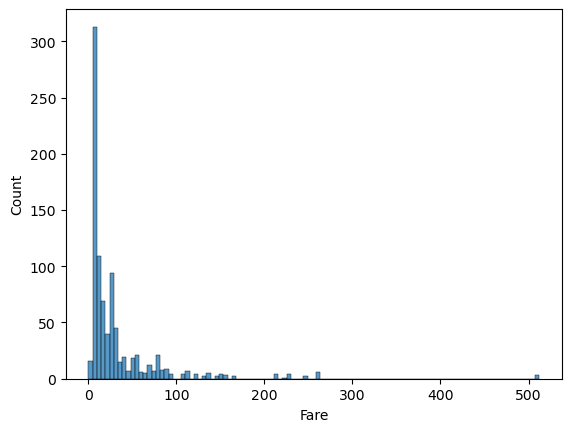

In [21]:
sns.histplot(x='Fare',data=df)

- A significant number of passengers have purchased cheap tickets.

<Axes: xlabel='Pclass', ylabel='Age'>

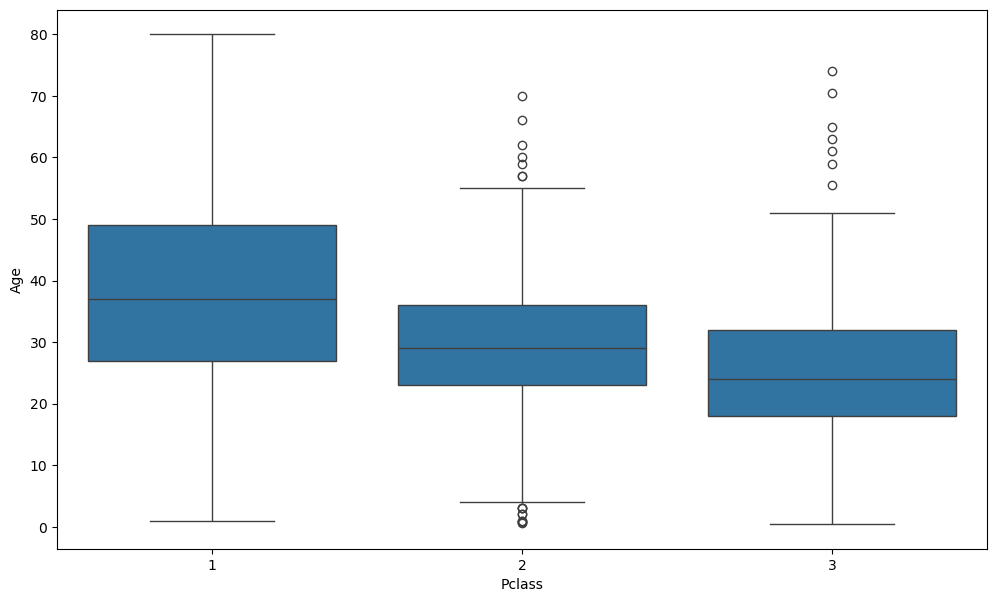

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [23]:
import pandas as pd

def age(col):
    Age = col.iloc[0]
    Pclass = col.iloc[1]

    if pd.isnull(Age):  
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

df['Age'] = df[['Age', 'Pclass']].apply(age, axis=1)


In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

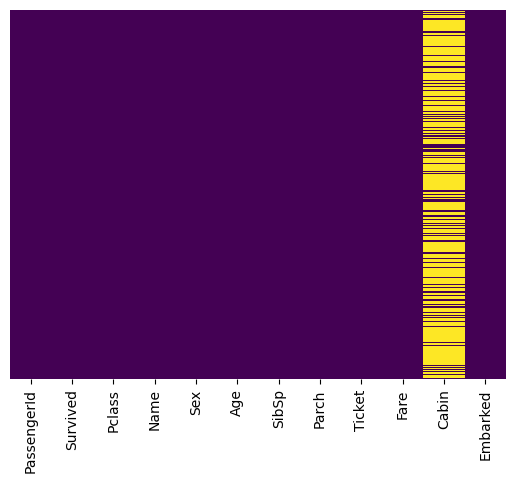

In [26]:
sns.heatmap(data=df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [27]:
df.drop('Cabin',axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [31]:
df['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [32]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
gender=pd.get_dummies(df['Sex'],drop_first=True,dtype=int)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [34]:
embark=pd.get_dummies(df['Embarked'],drop_first=True,dtype=int,)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [35]:
df=pd.concat([df,gender,embark],axis=1)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [37]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [39]:
df.drop(['Name','PassengerId','Ticket'],axis = 1,inplace=True)

In [40]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
df.shape

(889, 9)

# Train_Test_Split

In [42]:
X=df.iloc[:,1:-1]

In [43]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q
0,3,22.0,1,0,7.2500,1,0
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,0
3,1,35.0,1,0,53.1000,0,0
4,3,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0
887,1,19.0,0,0,30.0000,0,0
888,3,24.0,1,2,23.4500,0,0
889,1,26.0,0,0,30.0000,1,0


In [44]:
y=df.iloc[:,0]

In [45]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [46]:
X.shape

(889, 7)

In [47]:
y.shape

(889,)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.30,random_state=42)

In [49]:
X_train.shape

(266, 7)

In [50]:
y_train.shape

(266,)

In [51]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q
611,3,24.0,0,0,7.0500,1,0
298,1,37.0,0,0,30.5000,1,0
415,3,24.0,0,0,8.0500,0,0
151,1,22.0,1,0,66.6000,0,0
704,3,26.0,1,0,7.8542,1,0
...,...,...,...,...,...,...,...
107,3,24.0,0,0,7.7750,1,0
271,3,25.0,0,0,0.0000,1,0
862,1,48.0,0,0,25.9292,0,0
436,3,21.0,2,2,34.3750,0,0


In [52]:
y_train

611    0
298    1
415    0
151    1
704    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 266, dtype: int64

# Logistic Regression

In [53]:
#Initilize
logi = LogisticRegression()

In [54]:
#train
logi.fit(X_train,y_train)

LogisticRegression()

In [55]:
#predict
prediction = logi.predict(X_test)

In [56]:
prediction[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [57]:
prediction_probability = logi.predict_proba(X_test)

In [58]:
prediction_probability[:5]

array([[0.8606573 , 0.1393427 ],
       [0.08475138, 0.91524862],
       [0.32721339, 0.67278661],
       [0.748673  , 0.251327  ],
       [0.08089464, 0.91910536]])

In [59]:
result=classification_report(y_test,prediction)

In [60]:
print(result)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       378
           1       0.81      0.68      0.74       245

    accuracy                           0.81       623
   macro avg       0.81      0.79      0.80       623
weighted avg       0.81      0.81      0.81       623



In [61]:
accuracy=accuracy_score(y_test,prediction)

In [62]:
print(accuracy * 100) 

81.2199036918138


In [63]:
con_mat=confusion_matrix(y_test,prediction)

In [64]:
print(con_mat)

[[339  39]
 [ 78 167]]


In [65]:
print(result)
print('*' * 60)
print(con_mat)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       378
           1       0.81      0.68      0.74       245

    accuracy                           0.81       623
   macro avg       0.81      0.79      0.80       623
weighted avg       0.81      0.81      0.81       623

************************************************************
[[339  39]
 [ 78 167]]
